In [7]:
%matplotlib inline
%run helper_functions.py

import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

# Loading the Titanic Dataset (cleaned)

In [8]:
# Load the boston dataset from sklearn
dataset = pd.read_csv("../data/processed/titanic_clean.csv")
X = dataset.drop('survived', axis = 1)
y = dataset.survived

# to print stats
feature_names = X.columns
class_labels = ["Died", "Survived"]

In [9]:
X.head(10)

,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,3,male,22.0,1,0,7.2500,Southampton,False
1,1,female,38.0,1,0,71.2833,Cherbourg,False
2,3,female,26.0,0,0,7.9250,Southampton,True
3,1,female,35.0,1,0,53.1000,Southampton,False
4,3,male,35.0,0,0,8.0500,Southampton,True
5,3,male,28.0,0,0,8.4583,Queenstown,True
6,1,male,54.0,0,0,51.8625,Southampton,True
7,3,male,2.0,3,1,21.0750,Southampton,False
8,3,female,27.0,0,2,11.1333,Southampton,False
9,2,female,14.0,1,0,30.0708,Cherbourg,False


In [10]:
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: survived, dtype: int64

# Fitting a model with sklearn
(in this case we fit a Decision tree)

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y)


ValueError: could not convert string to float: 'male'

#### Predicting new data...

In [ ]:
model.predict(X[0:5])

array([0, 1, 1, 1, 0], dtype=int64)

In [ ]:
y[0:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: survived, dtype: int64

In [ ]:
model.predict(X[0:10])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

# Evaluation metrics

In [ ]:
from sklearn.metrics import *
# we predict some data
y_pred = model.predict(X)

#Accuracy
print ("Accuracy (train set) : ", accuracy_score(y, y_pred))

Accuracy (train set) :  0.9797525309336333


[[547   2]
 [ 16 324]]


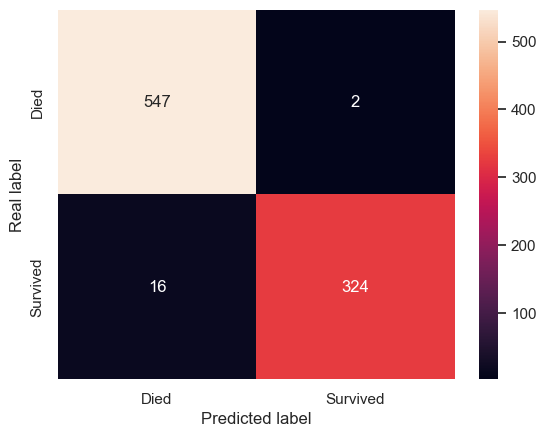

In [ ]:
#confusion matrix
cm =  confusion_matrix(y_pred=y_pred, y_true=y, labels=[0,1])
print (cm)
# Plotting confusion matrix (custom help function)
plot_confusion_matrix(cm, class_labels) 

In [ ]:
# Classification report
print (classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       549
           1       0.99      0.95      0.97       340

    accuracy                           0.98       889
   macro avg       0.98      0.97      0.98       889
weighted avg       0.98      0.98      0.98       889



# AUC
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

AUC:  0.9990222865102324


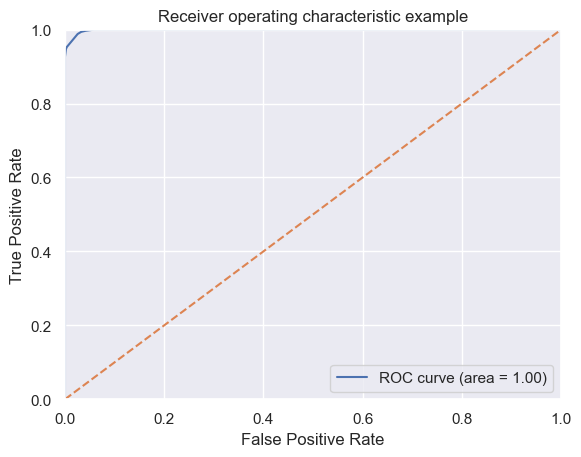

In [ ]:
# ROC/AUC
# Getting the probabilities per class
y_probabilities = model.predict_proba(X)

# Custom plot function
get_auc(y, y_probabilities, class_labels, column=1, plot=True) # Helper function


# Properly evaluating with a test set...

#### Splitting in test and train sets, train with train set only

Accuracy (test set):  0.7775280898876404 

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       275
           1       0.89      0.48      0.62       170

    accuracy                           0.78       445
   macro avg       0.82      0.72      0.73       445
weighted avg       0.80      0.78      0.76       445

AUC:  0.8019144385026739


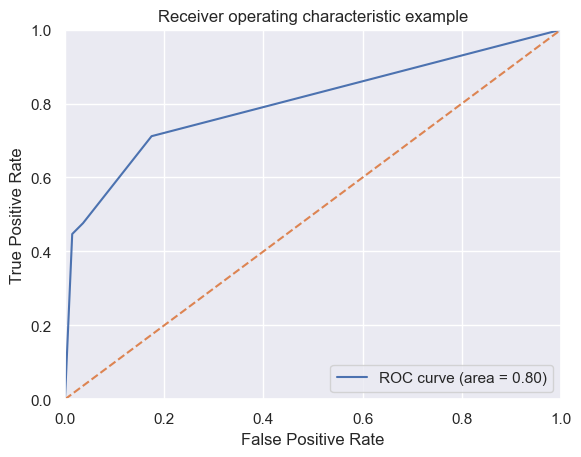

[[265  10]
 [ 89  81]]


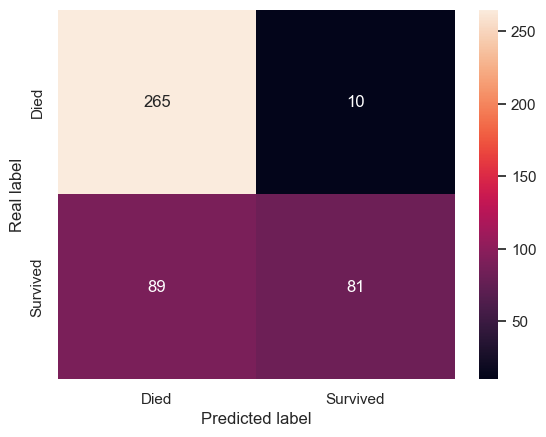

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


#### Train with train set
model  = DecisionTreeClassifier(max_leaf_nodes=4) # max_leaf_nodes=2...10
model.fit(X_train, y_train)


#### Evaluate with test set
# we predict some data
y_pred = model.predict(X_test)

#### Accuracy
print ("Accuracy (test set): ", accuracy_score(y_test, y_pred), "\n")

#### Classification report
print (classification_report(y_test, y_pred))

####  ROC/AUC
# Getting the probabilities per class
y_probabilities = model.predict_proba(X_test)
# Custom plot function
get_auc(y_test, y_probabilities, class_labels, column=1, plot=True) # Help function

#confusion matrix
cm =  confusion_matrix(y_test, y_pred)
print (cm)
# Plotting confusion matrix (custom help function)
plot_confusion_matrix(cm, class_labels) 

# Cross validating
## Cross-validation score

In [ ]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier() # we can now play with max_depth= 1, 10, 15
scores = cross_val_score(model, X, y, cv=10) # cv makes 10 models with each 90 percent of the data

print(scores)
print("Mean fold accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.74157303 0.82022472 0.73033708 0.79775281 0.83146067 0.76404494
 0.80898876 0.73033708 0.83146067 0.84090909]
Mean fold accuracy: 0.79 (+/- 0.08)


## Cross-validation predict
Predict the whole dataset in a cross-validated way (to avoid overfitting)

Accuracy (cross-validated):  0.8087739032620922
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       549
           1       0.80      0.67      0.73       340

    accuracy                           0.81       889
   macro avg       0.81      0.78      0.79       889
weighted avg       0.81      0.81      0.81       889

AUC:  0.834525340190721


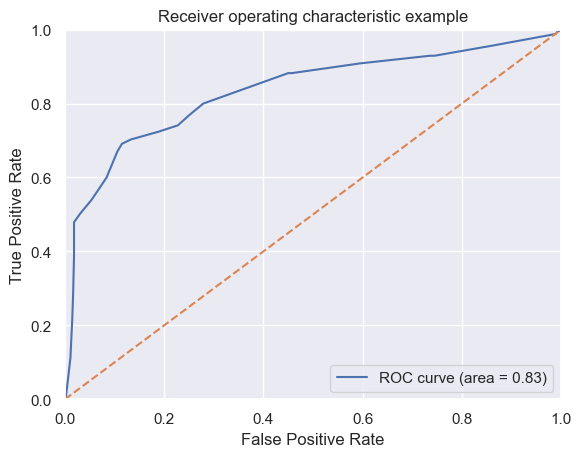

In [ ]:
from sklearn.model_selection import cross_val_predict

model = DecisionTreeClassifier(max_leaf_nodes=6) # we can now play with max_depth= 1, 10, 15

####  We use cross-validation to predict all the data with the best model. 
y_pred = cross_val_predict(model, X, y)

print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred))

####  Classification report
print (classification_report(y, y_pred))

####  ROC/AUC
# Getting the probabilities per class
y_probabilities = cross_val_predict(model, X, y, method='predict_proba')
# Custom plot function
get_auc(y, y_probabilities, class_labels, column=1, plot=True) # Help function


# Parameter tuning and Cross Validating

In [ ]:
from sklearn.model_selection import GridSearchCV
#### The parameeters to tune (as a dictionary name:values_to_try)
params = { 
           'max_depth'     :  range(1,20),
           'max_features'  :  range(1,10)
         }

#### Grid search
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, cv = 10, param_grid=params )
grid.fit(X, y)

####  Summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best parameters:  DecisionTreeClassifier(max_depth=7, max_features=8)
Best score:  0.8234422880490296


## Evaluating further the best found model
(cross validation using the best model)

Accuracy (cross-validated):  0.8222722159730034
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.83      0.68      0.74       340

    accuracy                           0.82       889
   macro avg       0.82      0.79      0.80       889
weighted avg       0.82      0.82      0.82       889

AUC:  0.8318359584270867


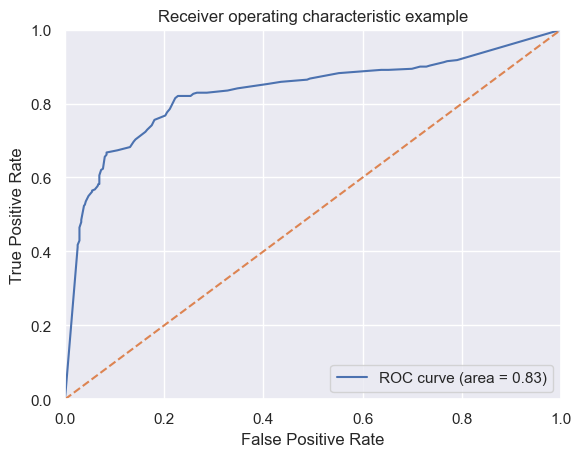

In [ ]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_predict

#### Get the best model from grid search (previous run)
model = grid.best_estimator_

#### FOLLOW THE SAME PROCESS AS BEFORE
#### We use cross-validation to predict all the data with the best model. 
y_pred = cross_val_predict(model, X, y)

#### Accuracy
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred))

####  Classification report
print (classification_report(y, y_pred))

####  ROC/AUC
# Getting the probabilities per class
y_probabilities = cross_val_predict(model, X, y, method='predict_proba')
# Custom plot function
get_auc(y, y_probabilities, class_labels, column=1, plot=True) # Help function

# Parameter tuning with final test-set evaluation.
- Cross validation to select the best model
- Test-set at the end to report the final accuracy

Best cross validated accuracy after tuning:  0.8310803891449053
Accuracy (test set):  0.7940074906367042
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       157
           1       0.89      0.57      0.70       110

    accuracy                           0.79       267
   macro avg       0.82      0.76      0.77       267
weighted avg       0.81      0.79      0.78       267

AUC:  0.8519976838448177


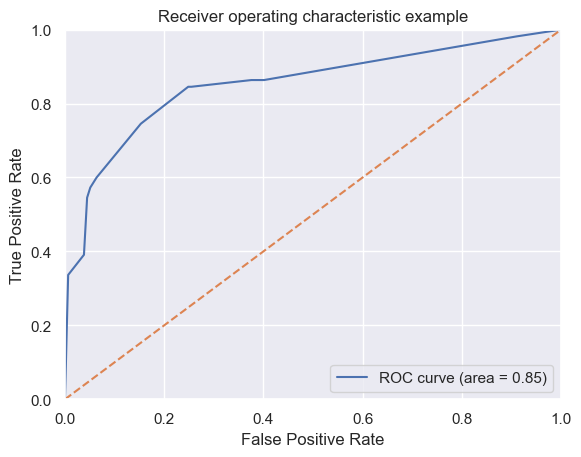

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 
           'max_depth'     :  range(1,20),
           'max_features'  :  range(1,10)
         }


#### Split the data. 
#### Train set to find and the best model using grid search
#### Test set to report the final accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

####  Grid search
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, cv = 10, param_grid=params )
grid.fit(X_train, y_train)
print("Best cross validated accuracy after tuning: ", grid.best_score_)

#### 
#### After tuning, lets see the performance on a seperate test set
y_pred = grid.best_estimator_.predict(X_test)

#### Accuracy on test set
print ("Accuracy (test set): ", accuracy_score(y_test, y_pred))
# Classification report
print (classification_report(y_test, y_pred))

####  ROC/AUC on test set
# Getting the probabilities per class
y_probabilities =  grid.best_estimator_.predict_proba(X_test)
# Custom plot function
get_auc(y_test, y_probabilities, class_labels, column=1, plot=True) # Help function


# Feature importance

In [ ]:
grid.best_estimator_.feature_importances_

array([0.11516565, 0.03953419, 0.0095559 , 0.09402336, 0.1841247 ,
       0.52492507, 0.00507692, 0.        , 0.02324395, 0.00435025])

In [ ]:
important_features = pd.Series(grid.best_estimator_.feature_importances_ ,index=X.columns)
important_features.sort_values(ascending=False)


sex_male                   0.524925
class                      0.184125
age                        0.115166
fare                       0.094023
sibsp                      0.039534
embark_town_Queenstown     0.023244
parch                      0.009556
alone_True                 0.005077
embark_town_Southampton    0.004350
embark_town_Cherbourg      0.000000
dtype: float64

# How to handle class imbalance


In [ ]:
wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [ ]:
wine_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
664,12.1,0.400,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2,5
1557,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,6
1369,6.6,0.610,0.00,1.6,0.069,4.0,8.0,0.99396,3.33,0.37,10.4,4
267,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
1405,7.7,0.280,0.30,2.0,0.062,18.0,34.0,0.99520,3.28,0.90,11.3,7


In [ ]:
wine_df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

## Let make it more imbalanced than it is....

In [ ]:
wine_df['quality'] = [1 if q >= 8 else 0 for q in wine_df.quality ]

In [ ]:
wine_df.quality.value_counts()

quality
0    1581
1      18
Name: count, dtype: int64

In [ ]:
# prepare the data
X = wine_df.drop('quality', axis =1)
y = wine_df.quality
X, y = sklearn.utils.shuffle(X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy (cross-validated):  0.9881175734834271
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1581
           1       0.00      0.00      0.00        18

    accuracy                           0.99      1599
   macro avg       0.49      0.50      0.50      1599
weighted avg       0.98      0.99      0.98      1599



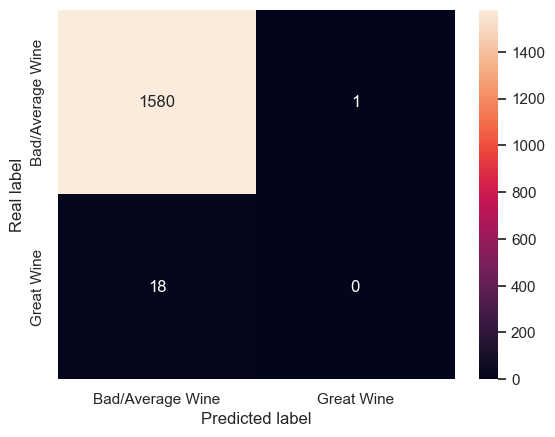

In [ ]:
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()#(class_weight='balanced')
y_pred = cross_val_predict(model, X, y)

#### Accuracy
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred))

####  Classification report
print (classification_report(y, y_pred))


#confusion matrix
cm =  confusion_matrix(y_pred=y_pred, y_true=y, labels=[0,1])
# Plotting confusion matrix (custom help function)
plot_confusion_matrix(cm, ["Bad/Average Wine", "Great Wine"]) 